In [4]:
print("hello")

hello


In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


ModuleNotFoundError: No module named 'tensorflow'

In [6]:
import math
import os
import pandas_datareader.data as web
import numpy as np
import datetime as dt
import pandas as pd
from tensorflow import keras 
from sklearn.preprocessing import MinMaxScaler
# from keras_models.models import CNN
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
df=web.DataReader('AMZN', data_source='yahoo',start='2013-01-01',end='2022-09-27')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,12.620500,12.137500,12.187500,12.543500,68380000.0,12.543500
2013-01-02,12.905000,12.663000,12.804000,12.865500,65420000.0,12.865500
2013-01-03,13.044000,12.818500,12.863500,12.924000,55018000.0,12.924000
2013-01-04,12.990000,12.832500,12.879000,12.957500,37484000.0,12.957500
2013-01-07,13.486500,13.133500,13.148500,13.423000,98200000.0,13.423000
...,...,...,...,...,...,...
2022-09-21,123.760002,118.449997,122.489998,118.540001,58498900.0,118.540001
2022-09-22,118.790001,116.260002,117.080002,117.309998,55229200.0,117.309998
2022-09-23,116.050003,112.059998,116.000000,113.779999,65081200.0,113.779999


In [11]:
df.shape

(2453, 6)

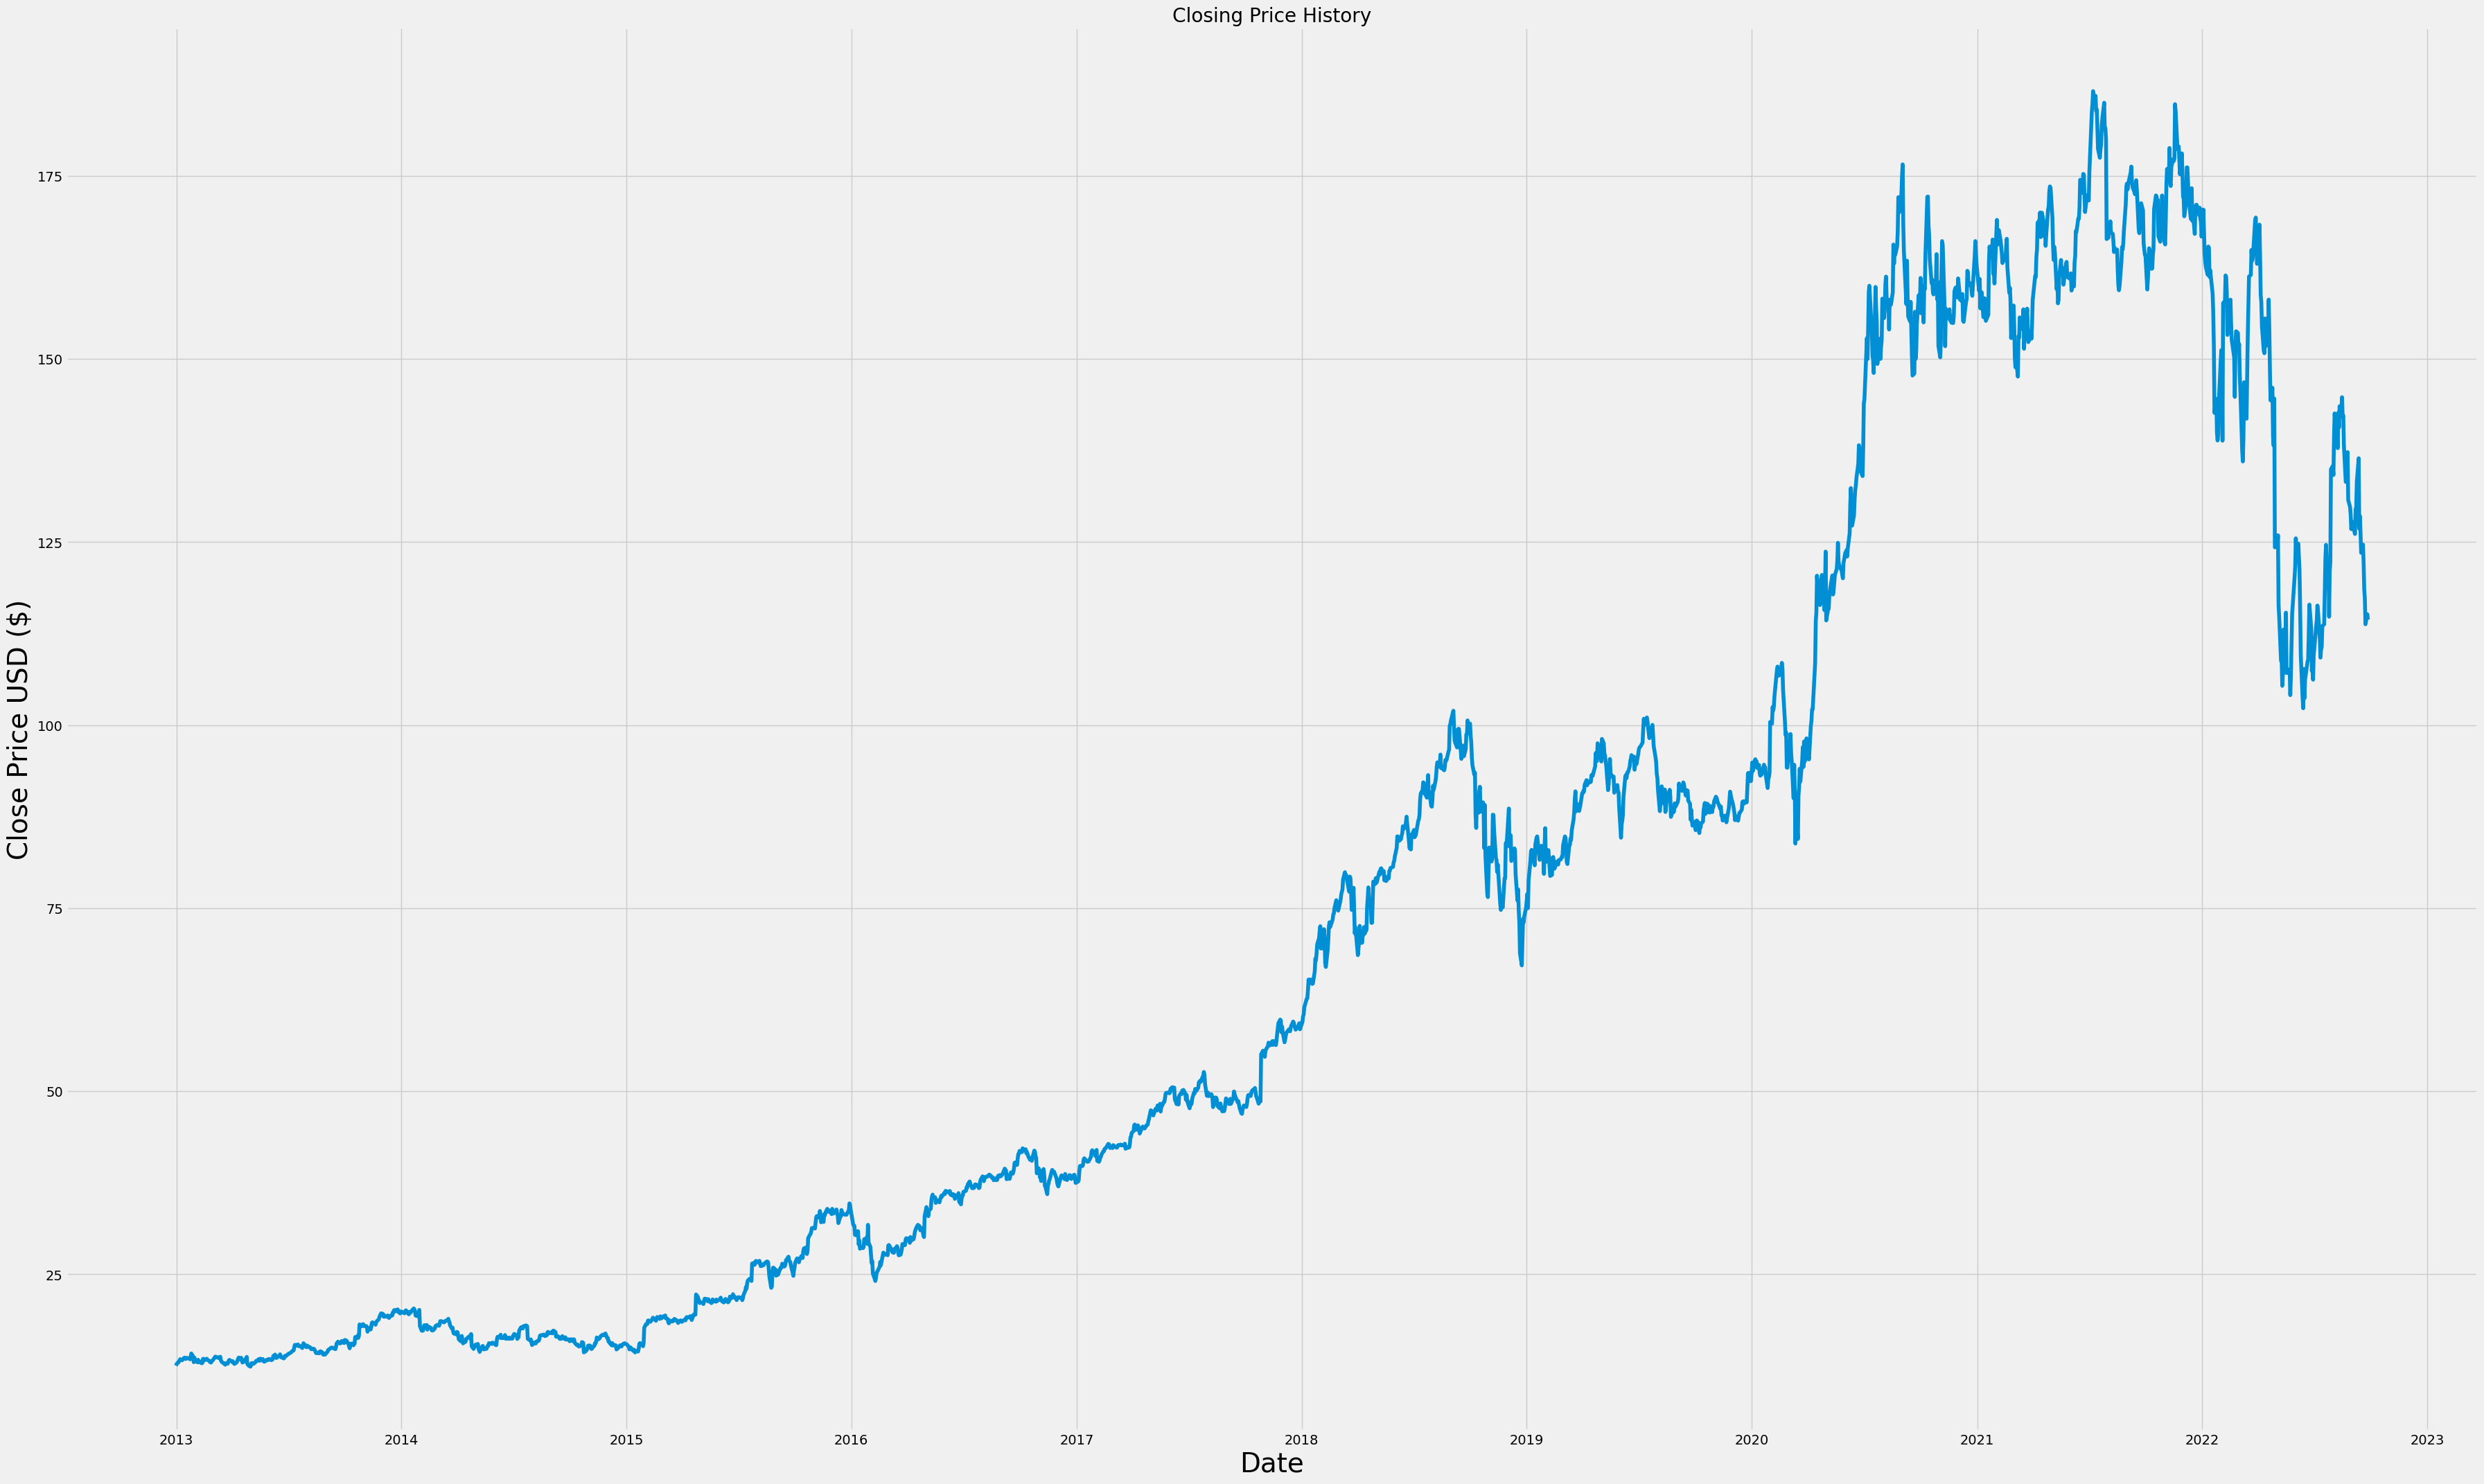

In [21]:
# visualise the closing price history
plt.figure(figsize=(40,25))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=28)
plt.ylabel('Close Price USD ($)',fontsize=28)
plt.show()

###### create a new dataframe
data = df.filter(['Close'])
#clovert the dataframe to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

In [7]:
#Scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

NameError: name 'MinMaxScaler' is not defined

In [14]:
#create the training dataset 
#create the scaled training dataset
train_data=scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00075793, 0.00260682, 0.00294271, 0.00313507, 0.00580791,
       0.00521076, 0.00520214, 0.00491218, 0.00565862, 0.0070338 ,
       0.00679552, 0.00594284, 0.00638784, 0.00685868, 0.00630458,
       0.00570743, 0.00724338, 0.01026648, 0.00798408, 0.00347958,
       0.00704241, 0.00495811, 0.00481457, 0.00337335, 0.00535717,
       0.00401645, 0.00344513, 0.00393893, 0.00257811, 0.00300588,
       0.00609788, 0.00603184, 0.00484041, 0.00617826, 0.00521937,
       0.00508443, 0.00493515, 0.00334177, 0.00319536, 0.00431215,
       0.00460499, 0.00502701, 0.0071429 , 0.00785489, 0.00733812,
       0.00736396, 0.00745296, 0.00660603, 0.00743573, 0.00771422,
       0.00502701, 0.00390161, 0.00277333, 0.00234843, 0.0025982 ,
       0.00148141, 0.00273313, 0.00223646, 0.0034681 , 0.0049007 ])]
[0.005242336771163994]

[array([0.00075793, 0.00260682, 0.00294271, 0.00313507, 0.00580791,
       0.00521076, 0.00520214, 0.00491218, 0.00565862, 0.0070338 ,
       0.00679552, 0.00594284, 0.0

In [15]:
#convert the x_train and y_train to numpy  arrays
x_train, y_train =np.array(x_train),np.array(y_train)

In [18]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1903, 60, 1)

In [2]:
#build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequence=False))
model.add(Dense(25))
model.add(Dense(1))

NameError: name 'Sequential' is not defined

In [6]:
#compile the model
model.compile(optimizer='adam' ,loss ='mean_squared_error')

In [7]:
#train the model
model.file(x_train,y_train,batch_size=1 ,epochs=1)

NameError: name 'model' is not defined

In [1]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60 ,:]
#create the data sets x_test and y_test 
x_test =[]
y_test =dataset [training_data_len:, :]
for i in range(60 ,len(test_data)):
    x_test.append(test_data[i-60:1,0])

NameError: name 'scaled_data' is not defined

In [2]:
#convert the data to a numpy array
x_test=np.array(x_test)

NameError: name 'np' is not defined

In [3]:
# reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

NameError: name 'np' is not defined

In [4]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

NameError: name 'model' is not defined

In [5]:
# get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean(((predictions - y_test)**2)))
rmse

NameError: name 'np' is not defined

In [ ]:
#plot the data
train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.titile('Model')
plg.xlabel 